# Pymaceuticals Inc.
---

### Analysis

- The analysis reveals insights into the relationship between time and the tumor size in mice, as well as the effectiveness of various drugs in reducing the tumor growth.

- Over time, there is a reduction in the tumor size, suggesting the potential theraputic effect of the treatments administered.

- The boxplot shows that the drug Infubinol is an outlier in comparison to the other drugs within the dataset. 

- The bar graph shows evidence that the drugs Capomulin and Ramicane have higher use amoungst the lab mice.  

- The gender within the dataset reveals a slight imbalance, with male mice outnumbering female mice by a small percentage. 

- The findings suggest that Ramicane may offer more benefits compared to other drugs in the dataset, it potentially is a more effective treatment option for tumor reduction in mice.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(complete_data["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_data.loc[complete_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = complete_data.loc[complete_data["Mouse ID"] == "g989"]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_ID = complete_data[complete_data["Mouse ID"].isin(duplicate_mice)==False]
clean_duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = len(clean_duplicate_ID["Mouse ID"].unique())
total_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_duplicate_ID.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
median = clean_duplicate_ID.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
variance = clean_duplicate_ID.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
st_dev_tumor_volume = clean_duplicate_ID.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
st_dev_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
SEM_tumor_volume =clean_duplicate_ID.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
SEM_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Assemble the resulting series into a single summary DataFrame.
summary_tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean,
                                      "Median Tumor Volume": median,
                                      "Tumor Volume Variance": variance,
                                      "Tumor Volume Std. Dev.": st_dev_tumor_volume,
                                      "Tumor Volume Std. Err.": SEM_tumor_volume})


#Displaying DataFrame
summary_tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_tumor_volume = clean_duplicate_ID.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg({'mean', 'median', 'var','std','sem'})


#Displaying DataFrame
summary_tumor_volume

,mean,var,std,median,sem
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,4.994774,41.557809,0.329346
Ceftamin,52.591172,39.290177,6.268188,51.776157,0.469821
Infubinol,52.884795,43.128684,6.567243,51.820584,0.492236
Ketapril,55.235638,68.553577,8.279709,53.698743,0.603860
Naftisol,54.331565,66.173479,8.134708,52.509285,0.596466
Placebo,54.033581,61.168083,7.821003,52.288934,0.581331
Propriva,52.320930,43.852013,6.622085,50.446266,0.544332
Ramicane,40.216745,23.486704,4.846308,40.673236,0.320955
Stelasyn,54.233149,59.450562,7.710419,52.431737,0.573111


## Bar and Pie Charts

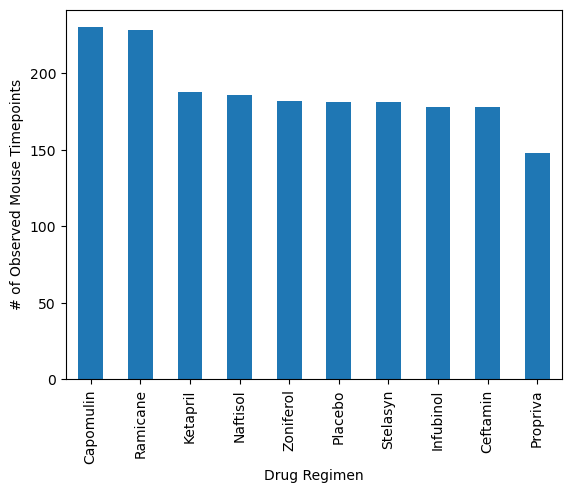

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Making a variable for what is being counted which is Drug Regimen
total_number = clean_duplicate_ID['Drug Regimen'].value_counts()

ax = total_number.plot(x='Mouse ID',    # values on x-axis
             y=['Drug Regimen'],          # values on y-axis
             kind='bar',              # specify that it is a bar-plot
             xlabel="Drug Regimen",          # set x-axis
             # figsize=(6,8),          # set figure size
             ylabel='# of Observed Mouse Timepoints')       # set y-axis label
             # color=['blue'])   # set bar colors

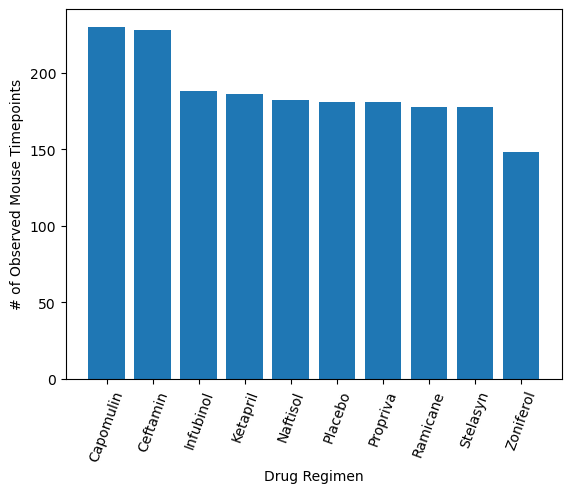

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#setting up a variable to count through the Drug Regimen column
total_number = clean_duplicate_ID['Drug Regimen'].value_counts()
x_axis = np.arange(len(total_number))

# Create a bar chart based upon the above data
plt.bar(x_axis, total_number, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# setting x-axis and y-axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# fixing the X-axis to be readable
plt.tick_params(axis='x', rotation=70)

# displaying the graph
plt.show()


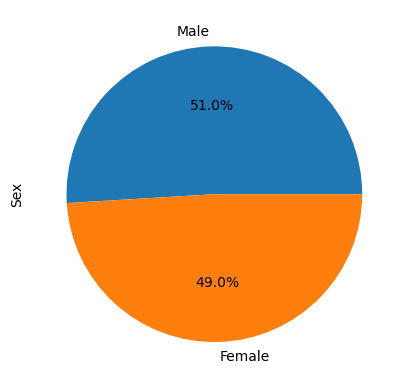

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_versus = clean_duplicate_ID['Sex'].value_counts()
female_versus.plot.pie( autopct="%1.1f%%")
plt.ylabel('Sex')

# Display graph
plt.show()

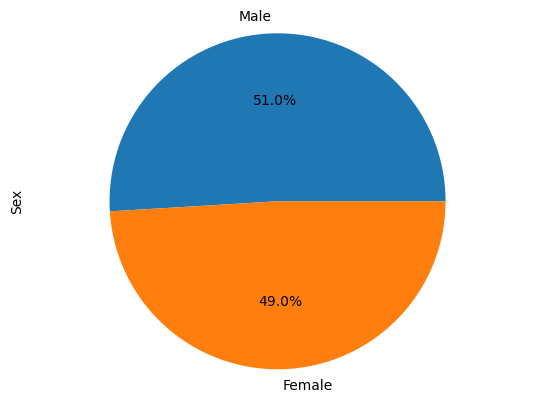

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_versus = clean_duplicate_ID['Sex'].value_counts()

female_versus.plot(kind='pie', autopct="%1.1f%%")
plt.ylabel('Sex')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Display graph
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin", :]
ramicane = complete_data.loc[complete_data["Drug Regimen"] == "Ramicane", :]
infubinol = complete_data.loc[complete_data["Drug Regimen"] == "Infubinol", :]
ceftamin = complete_data.loc[complete_data["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# infubinol
infubinol_last = infubinol.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_duplicate_ID, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [23]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
# Infubinol
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {lower} could be outliers.")
print(f"Values above {upper} could be outliers.")





The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [24]:
# Capomulin
capomulin_last = capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_duplicate_ID, on=("Mouse ID","Timepoint"),how="left")


capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {lower} could be outliers.")
print(f"Values above {upper} could be outliers.")



The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [25]:
# Ramicane
ramicane_last = ramicane.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_duplicate_ID, on=("Mouse ID","Timepoint"),how="left")


ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {lower} could be outliers.")
print(f"Values above {upper} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [26]:
# ceftamin
ceftamin_last = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_duplicate_ID, on=("Mouse ID","Timepoint"),how="left")


ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {lower} could be outliers.")
print(f"Values above {upper} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


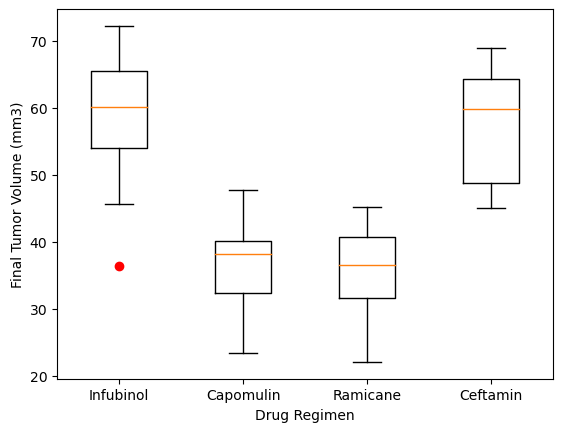

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_vol =[infubinol_tumors, capomulin_tumors, ramicane_tumors, ceftamin_tumors]

drugs = ["Infubinol", "Capomulin", "Ramicane", "Ceftamin"]



fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol, labels=drugs, vert=True, sym="red")
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Capomulin

capomulin_last = capomulin.groupby("Mouse ID").max()["Timepoint"] #finding the maximum values
capomulin_vol = pd.DataFrame(capomulin_last) # placing the variable through a dataframe
capomulin_merge = pd.merge(capomulin_vol, clean_duplicate_ID, on=("Mouse ID","Timepoint"),how="left") #merging all information to make dataframe
#displaying dataframe
capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


Text(0, 0.5, 'Tumor Volume (mm3)')

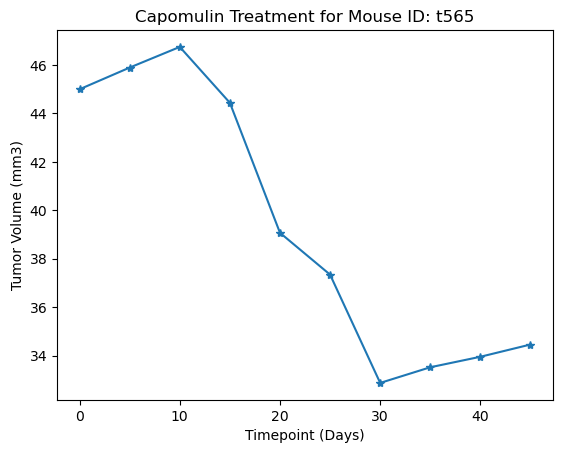

In [29]:
# Mouse ID t565	

# setting a variable to equal which mouse ID to use
capomulin_plot = clean_duplicate_ID.loc[clean_duplicate_ID["Mouse ID"] == "t565", :]

#setting up the x and y axis
x_axis = capomulin_plot["Timepoint"]
y_axis = capomulin_plot["Tumor Volume (mm3)"]

#plotting line grapgh
fig1, ax1 = plt.subplots()

plt.plot(x_axis, y_axis, marker='*')

#labeling the graph
plt.title("Capomulin Treatment for Mouse ID: t565")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

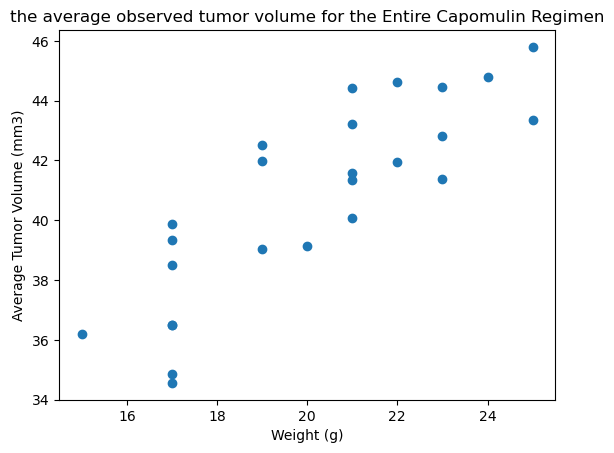

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# making a varible for Capomulin to pass through the dataframe
capomulin = clean_duplicate_ID[clean_duplicate_ID["Drug Regimen"]== "Capomulin"]

# using groupby to use capomulin variable to pass the weight(col 1) and tumor volue (col2)
x_avg_weight = capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# setting each variable to equal what is being looked for
x_weight = x_avg_weight["Weight (g)"]
y_volume = x_avg_weight["Tumor Volume (mm3)"]

#plotting scatter plot
plt.scatter(x_weight, y_volume)

# labeling graph
plt.title("the average observed tumor volume for the Entire Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#displaying graph
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


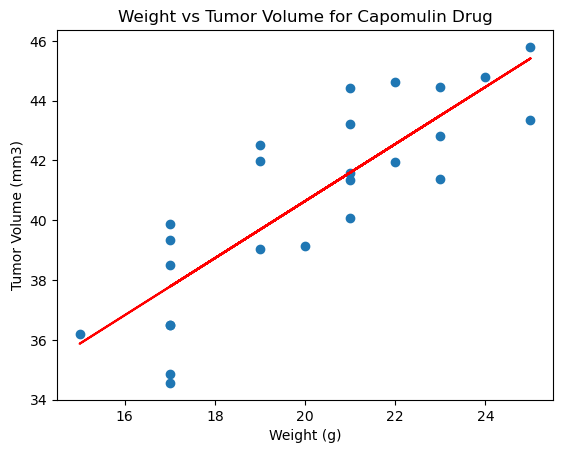

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating the correlation coefficient
cor = st.pearsonr(x_avg_weight['Weight (g)'],x_avg_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}")

# calculationg linear regression line 
(slope, intercept, r_value, p_value, std) = linregress(x_avg_weight["Weight (g)"], x_avg_weight["Tumor Volume (mm3)"])
r_value = x_avg_weight["Weight (g)"]* slope + intercept
lineeq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#assigning what type of plot
plt.scatter(x_avg_weight["Weight (g)"],x_avg_weight["Tumor Volume (mm3)"])
plt.plot(x_avg_weight["Weight (g)"], r_value, color='red')

#labeling the Graph
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin Drug")

# Displaying graph
plt.show()